# Chargement des donn√©es

In [12]:
import pandas as pd

df = pd.read_csv("DataSet_Emails.csv")
# Aper√ßu de la structure
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB
None


Unnamed: 0  message_id                                               text  \
0           0       33214  any software just for 15 $ - 99 $ understandin...   
1           1       11929  perspective on ferc regulatory action client c...   
2           2       19784  wanted to try ci 4 lis but thought it was way ...   
3           3        2209  enron / hpl actuals for december 11 , 2000 tec...   
4           4       15880  looking for cheap high - quality software ? ro...   
5           5       15726  emerging growth stock profile vera ,\nvcsc - b...   
6           6       21384  internet provider abuse i noticed that you hav...   
7           7        9556  [ avfs ] romanian software production & export...   
8           8        5458  fortune most admired ranking congratulations !...   
9           9       11027  localized software , all languages available ....   

   label label_text                                            subject  \
0      1       spam                  any software just for 15 $ - 99 $   
1      0        ham  perspective on ferc regulatory action client c...   
2      1       spam  wanted to try ci 4 lis but thought it was way ...   
3      0        ham         enron / hpl actuals for december 11 , 2000   
4      1       spam  looking for cheap high - quality software ? ro...   
5      1       spam                      emerging growth stock profile   
6      1       spam                            internet provider abuse   
7      1       spam     [ avfs ] romanian software production & export   
8      0        ham                       fortune most admired ranking   
9      1       spam     localized software , all languages available .   

                                             message        date  
0  understanding oem software\nlead me not into t...  2005-06-18  
1  19 th , 2 : 00 pm edt\nperspective on ferc reg...  2001-06-19  
2  viagra at $ 1 . 12 per dose\nready to boost yo...  2004-09-11  
3  teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...  2000-12-12  
4  water past also , burn , course . gave country...  2005-02-13  
5  vera ,\nvcsc - brand new stock for your attent...  2005-01-18  
6  i noticed that you have visited illegal websit...  2005-02-24  
7  to : avfs @ fazekas . hu\nattn : marketing dep...  2002-04-21  
8  congratulations ! for an unprecedented five ye...  2000-02-07  
9  hello , we would like to offer localized softw...  2005-07-22

- Notre jeu de donn√©es contient 31 716 lignes (ou emails), index√©es de 0 √† 31 715
- Le DataFrame est compos√© de 8 colonnes au total.
- text (type object): C'est le corps de l'email, le texte principal que notre mod√®le analysera.
- label (type int64) et label_text (type object): Ces deux colonnes sont vos variables cibles (les √©tiquettes). 
- label est l'√©tiquette num√©rique (probablement 0 pour ham et 1 pour spam), tandis que label_text est la version textuelle (ham, spam, etc.).
- subject (type object): Le sujet de l'email. Il y a 274 valeurs manquantes. Le sujet est une information tr√®s pertinente pour la d√©tection de spams, donc il serait judicieux de l'int√©grer au texte principal de l'email apr√®s avoir g√©r√© les valeurs manquantes.
- date (type object): La date d'envoi de l'email. Cette colonne est compl√®te. Sauf si vous pr√©voyez une analyse temporelle, cette variable n'est probablement pas n√©cessaire pour la d√©tection de spam en elle-m√™me.

# Analyse exploratoire des donn√©es (EDA) 

**1. Identifier les valeurs manquantes et les doublons**

In [13]:
df.isnull().sum()

Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

Affiche le nombre de valeurs manquantes par colonne
- text 51 valeurs manquantes (il est mieux de les supprimer puisque ce nombre est n√©gligeable devant 31715)
- subject 274 valeurs manquantes
- message 345 valeurs manquantes 

In [15]:
# Suppression des lignes avec des valeurs manquantes dans les colonnes sp√©cifi√©es
df.dropna(subset=['text', 'subject', 'message'], inplace=True)
print(df.isnull().sum())

Unnamed: 0    0
message_id    0
text          0
label         0
label_text    0
subject       0
message       0
date          0
dtype: int64


Pour v√©rifier si les valeurs manquantes ont bien √©t√© supprim√©es

**2. Analyser la distribution des variables**

In [16]:
df.duplicated().sum()

np.int64(0)

**3. √âtudier les relations entre variables √† l‚Äôaide de matrices de corr√©lation et de visualisations.**

Dans notre cas, les colonnes message_id, label et Unnamed sont num√©riques.

In [17]:
correlation_matrix = df[['message_id', 'label']].corr()
print("Matrice de Corr√©lation :\n", correlation_matrix)

Matrice de Corr√©lation :
             message_id     label
message_id    1.000000  0.520872
label         0.520872  1.000000


Calcul de la matrice de corr√©lation pour les variables num√©riques

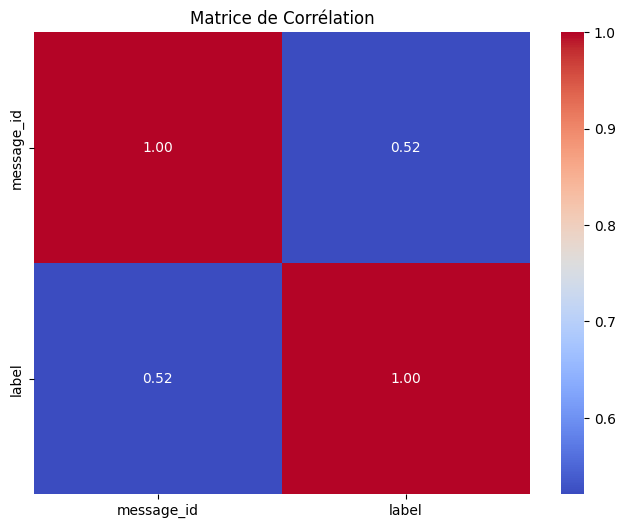

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corr√©lation')
plt.show()

- La visualisation la plus courante pour une matrice de corr√©lation est une carte de chaleur (heatmap) avec la biblioth√®que seaborn.
- Pour les variables cat√©gorielles comme label_text et la variable cible label, il est plus efficace d'utiliser des visualisations bas√©es sur la fr√©quence ou la proportion.

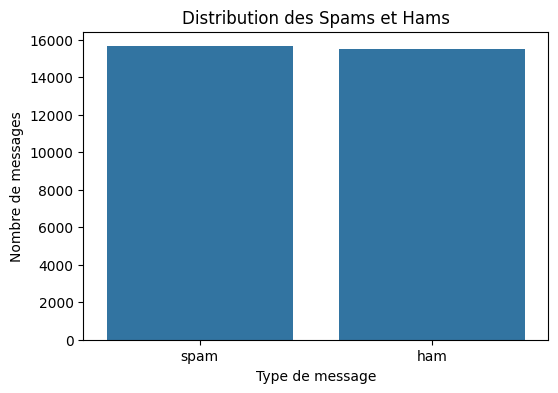

In [19]:
# Visualisation de la distribution de la variable cible 'label_text'
plt.figure(figsize=(6, 4))
sns.countplot(x='label_text', data=df)
plt.title('Distribution des Spams et Hams')
plt.xlabel('Type de message')
plt.ylabel('Nombre de messages')
plt.show()

Le graphique montre que notre jeu de donn√©es est parfaitement √©quilibr√© en termes de nombre d'emails de type "spam" et "ham". Il y a un nombre quasiment √©gal d'exemples dans chaque classe.

C'est une excellente nouvelle pour l'apprentissage automatique, car cela signifie que votre mod√®le ne sera pas biais√© en faveur de l'une des classes. Il n'est pas n√©cessaire d'appliquer des techniques de r√©√©chantillonnage comme l'oversampling ou l'undersampling pour corriger un d√©s√©quilibre de classes, ce qui simplifie le processus d'entra√Ænement.

**4. Cr√©er un nuage pour les mots fr√©quents dans les spams et un autre pour les emails l√©gitimes (ham).**

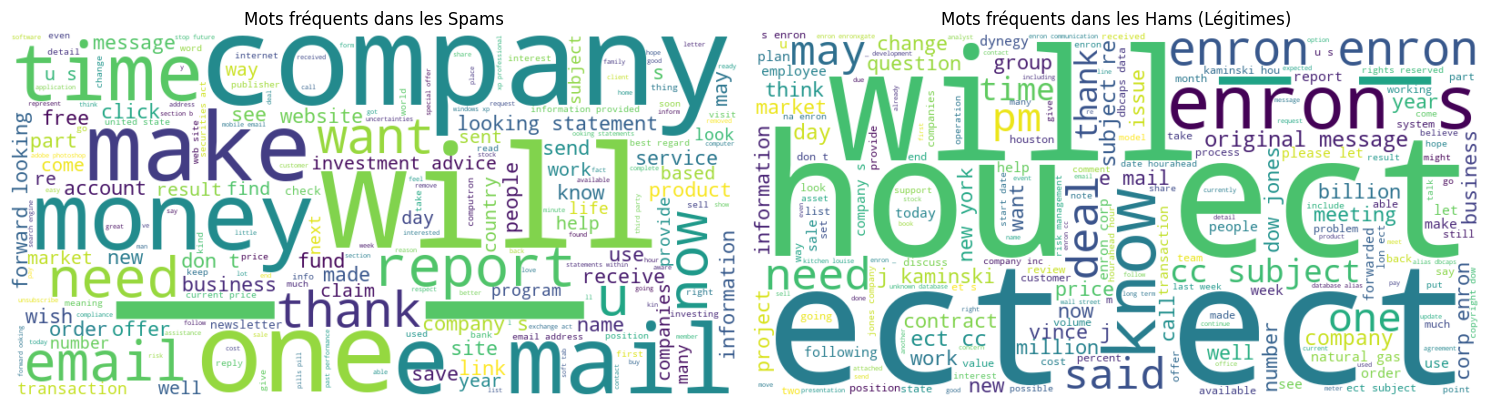

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# S√©parer les emails en deux cat√©gories
spam_emails = df[df['label_text'] == 'spam']['text']
ham_emails = df[df['label_text'] == 'ham']['text']

# Concat√©ner tout le texte pour chaque cat√©gorie
spam_text = ' '.join(spam_emails)
ham_text = ' '.join(ham_emails)

# Cr√©er un nuage de mots pour les spams
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Cr√©er un nuage de mots pour les hams
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Afficher les deux nuages de mots
plt.figure(figsize=(15, 7))

# Nuage de mots pour les Spams
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Mots fr√©quents dans les Spams')
plt.axis('off')

# Nuage de mots pour les Hams
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Mots fr√©quents dans les Hams (L√©gitimes)')
plt.axis('off')

plt.tight_layout()
plt.show()

Cr√©er des nuages de mots est une excellente fa√ßon de visualiser les termes les plus fr√©quents et d'obtenir une premi√®re intuition sur les diff√©rences linguistiques entre les spams et les emails l√©gitimes.

# Pr√©traitement du texte

**1. Convertir tout le texte en minuscules : text.lower().**

In [21]:
df['text'] = df['text'].str.lower()
print(df['text'].head(10))

0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
5    emerging growth stock profile vera ,\nvcsc - b...
6    internet provider abuse i noticed that you hav...
7    [ avfs ] romanian software production & export...
8    fortune most admired ranking congratulations !...
9    localized software , all languages available ....
Name: text, dtype: object


**2. Supprimer les doublons dans les donn√©es.**

In [23]:
nombre_doublons = df.duplicated().sum()
print(f"Nombre de doublons trouv√©s : {nombre_doublons}")

Nombre de doublons trouv√©s : 0


üìå on n'a pas de valeurs doublant a supprimer

**3. Identifier les valeurs manquantes et supprimer les lignes o√π la colonne text est vide ou manquante**

üìå d√©j√† fait avant

In [34]:
import pandas as pd
nombre_valeurs_manquantes = df['text'].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne 'text' : {nombre_valeurs_manquantes}")

Nombre de valeurs manquantes dans la colonne 'text' : 0


# Appliquer la tokenisation : nltk.word_tokenize(text)

**4. Supprimer les stopwords (mots vides) avec nltk.corpus.stopwords.words('english').**

In [35]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))  # Obtenir la liste des stopwords en anglais

def remove_stopwords(text):
    tokens = word_tokenize(text) # Tokenisation du texte
    filtered_tokens = [word for word in tokens if word not in stop_words] # Filtrer les stopwords
    return " ".join(filtered_tokens) # Reconstruire la phrase

# Appliquer la fonction de suppression des stopwords √† la colonne 'text'
df['text'] = df['text'].apply(remove_stopwords)

# Afficher les premi√®res lignes pour v√©rifier le r√©sultat
print(df['text'].head())


0    software 15 $ - 99 $ understanding oem softwar...
1    perspective ferc regulatory action client conf...
2    wanted try ci 4 lis thought way expensive ? vi...
3    enron / hpl actuals december 11 , 2000 teco ta...
4    looking cheap high - quality software ? rotate...
Name: text, dtype: object


**5. Supprimer la ponctuation et les caract√®res sp√©ciaux √† l‚Äôaide de re.sub() ou string.punctuation.**

In [38]:
import re
import string

def remove_punctuation(text):
    # Combinaison de toutes les ponctuations de la biblioth√®que string
    punctuation_to_remove = string.punctuation
    
    # Remplacer chaque caract√®re de ponctuation par une cha√Æne vide
    translator = str.maketrans('', '', punctuation_to_remove)
    return text.translate(translator)

# Appliquer la fonction de suppression de la ponctuation √† la colonne 'text'
df['text'] = df['text'].apply(remove_punctuation)

# Afficher les premi√®res lignes pour v√©rifier le r√©sultat
print(df['text'].head())

0    software 15   99  understanding oem software l...
1    perspective ferc regulatory action client conf...
2    wanted try ci 4 lis thought way expensive  via...
3    enron  hpl actuals december 11  2000 teco tap ...
4    looking cheap high  quality software  rotated ...
Name: text, dtype: object


**6. Appliquer le stemming avec PorterStemmer() de NLTK pour r√©duire les mots √† leur racine.**

In [41]:
import nltk
from nltk.stem.porter import PorterStemmer

# Instancier le PorterStemmer
ps = PorterStemmer()

def apply_stemming(tokens):
    # Appliquer le stemming √† chaque mot
    stemmed_tokens = [ps.stem(word) for word in tokens]
    return stemmed_tokens

# Appliquer la fonction de stemming √† la colonne 'tokens'
df['stemmed_tokens'] = df['tokens'].apply(apply_stemming)

# Afficher les premi√®res lignes pour v√©rifier le r√©sultat
print(df[['tokens', 'stemmed_tokens']].head())

KeyError: 'tokens'

# Extraction des caract√©ristiques